In [1]:
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

In [2]:
with open("opt_real.json", "r") as f:
    loaded_data = json.load(f)

# Extract lists
exp_Z_opt = loaded_data["exp_Z"]
exp_ZZ_opt = loaded_data["exp_ZZ"]
var_Z_opt = loaded_data["var_Z"]
var_ZZ_opt = loaded_data["var_ZZ"]

In [3]:
with open("base_real.json", "r") as f:
    loaded_data = json.load(f)

# Extract lists
exp_Z_base = loaded_data["exp_Z"]
exp_ZZ_base = loaded_data["exp_ZZ"]
var_Z_base = loaded_data["var_Z"]
var_ZZ_base = loaded_data["var_ZZ"]

In [4]:
with open("qutip.json", "r") as f:
    loaded_data = json.load(f)

# Extract lists
exp_Z_g = loaded_data["exp_Z"]
exp_ZZ_g = loaded_data["exp_ZZ"]

In [5]:
with open("opt.json", "r") as f:
    loaded_data = json.load(f)

# Extract lists
exp_Z_opt_g = loaded_data["exp_Z"]
exp_ZZ_opt_g = loaded_data["exp_ZZ"]

In [6]:
with open("base.json", "r") as f:
    loaded_data = json.load(f)

# Extract lists
exp_Z_base_g = loaded_data["exp_Z"]
exp_ZZ_base_g = loaded_data["exp_ZZ"]

In [7]:
ls1 = np.arange(0.5, 1.01, 0.01)
ls2 = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
colors = sns.color_palette("rocket", 6)

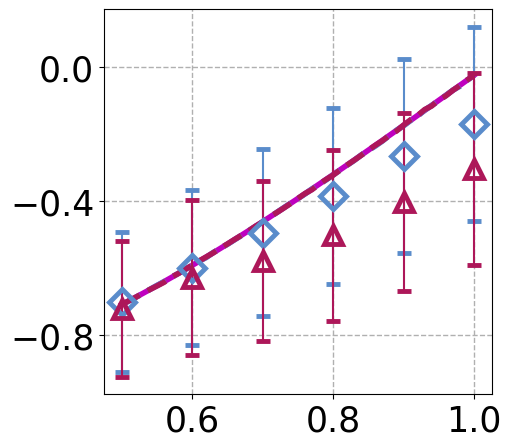

In [8]:
plt.figure(figsize=(5, 5))
plt.plot(ls1, exp_Z_g, linestyle='-', color='m', label="TH", linewidth=4)
plt.plot(ls1, exp_Z_opt_g, linestyle='--', color="#5A8CCB", label="QTurbo_TH", linewidth=4)
plt.errorbar(ls2, exp_Z_opt, yerr=np.sqrt(var_Z_opt), linestyle='none', marker='D', markerfacecolor='none', markersize=13, markeredgewidth=3.5, color="#5A8CCB", capsize=5, label="QTurbo")
plt.plot(ls1, exp_Z_base_g, linestyle='--', color=colors[2], label="SimuQ_TH", linewidth=4)
plt.errorbar(ls2, exp_Z_base, yerr=np.sqrt(var_Z_base), linestyle='none', marker='^', markerfacecolor='none', markersize=13, markeredgewidth=3.5, color=colors[2], capsize=5, label="SimuQ")
# plt.plot(ls2, exp_Z_opt, marker='s', linestyle='-', color='r', label="opt")
# plt.plot(ls2, exp_Z_opt, linestyle='none', marker='s', markerfacecolor='none', markersize=15, markeredgewidth=4, linewidth=1, color=colors[5], label="QTurbo")
plt.grid(True, linestyle='--', linewidth=1.0)
# plt.xlabel("Evolution Time")
# plt.ylabel("Z values")
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.2))  
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.4)) 
# plt.legend(fontsize=15, framealpha=0.7)
# plt.ylim(-1, 1)
plt.savefig("Z Expectation Value.png", dpi=300, bbox_inches="tight")
plt.show()

In [9]:
z_reduction = []
E_opt = 0
E_base = 0
for i in range(6):
    err_opt = abs(exp_Z_opt[i]-exp_Z_g[10*i])
    err_base = abs(exp_Z_base[i]-exp_Z_g[10*i])
    E_opt = E_opt + err_opt
    E_base = E_base + err_base
    z_reduction.append((err_base-err_opt)/err_base*100)
print(z_reduction)
print((E_base-E_opt)/E_base*100)

[32.068775346649645, 80.66986983783696, 71.88085345921651, 64.33916011452652, 59.95476682039964, 48.12577000210144]
59.113268191298864


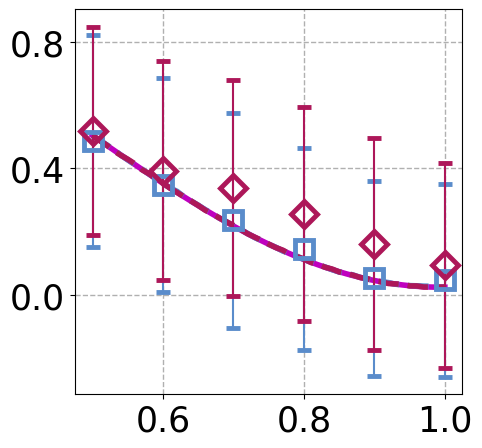

In [10]:
plt.figure(figsize=(5, 5))
plt.plot(ls1, exp_ZZ_g, linestyle='-', color='m', label="TH", linewidth=4)
plt.plot(ls1, exp_ZZ_opt_g, linestyle='--', color="#5A8CCB", label="QTurbo_TH", linewidth=4)
plt.errorbar(ls2, exp_ZZ_opt, yerr=np.sqrt(var_ZZ_opt), linestyle='none', marker='s', markerfacecolor='none', markersize=13, markeredgewidth=3.5, color="#5A8CCB", capsize=5, label="QTurbo")
plt.plot(ls1, exp_ZZ_base_g, linestyle='--', color=colors[2], label="SimuQ_TH", linewidth=4)
plt.errorbar(ls2, exp_ZZ_base, yerr=np.sqrt(var_ZZ_base), linestyle='none', marker='D', markerfacecolor='none', markersize=13, markeredgewidth=3.5, color=colors[2], capsize=5, label="SimuQ")
# plt.plot(ls2, exp_Z_opt, marker='s', linestyle='-', color='r', label="opt")
# plt.plot(ls2, exp_ZZ_opt, linestyle='none', marker='s', markerfacecolor='none', markersize=15, markeredgewidth=4, linewidth=1, color=colors[5], label="QTurbo")
plt.grid(True, linestyle='--', linewidth=1.0)
# plt.xlabel("Evolution Time")
# plt.ylabel("Z values")
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.2))  
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.4)) 
# plt.legend(fontsize=15, framealpha=0.7)
# plt.ylim(-1, 1)
plt.savefig("ZZ Expectation Value.png", dpi=300, bbox_inches="tight")
plt.show()

In [11]:
zz_reduction = []
E_opt = 0
E_base = 0
for i in range(6):
    err_opt = abs(exp_ZZ_opt[i]-exp_ZZ_g[10*i])
    err_base = abs(exp_ZZ_base[i]-exp_ZZ_g[10*i])
    E_opt = E_opt + err_opt
    E_base = E_base + err_base
    zz_reduction.append((err_base-err_opt)/err_base*100)
print(zz_reduction)
print((E_base-E_opt)/E_base*100)

[-25.403327491621873, 87.34553970202808, 84.94552158359677, 76.40786694415544, 94.01561500772907, 69.29047083625308]
79.56880549993647
